# Holiday Package Prediction

# Dataset

Perusahaan "Trips&Travel.com" ingin mengaktifkan dan membangun model bisnis yang layak untuk memperluas basis pelanggan. Salah satu cara untuk memperluas basis pelanggan adalah dengan memperkenalkan penawaran paket baru. Saat ini, ada 5 jenis paket yang ditawarkan perusahaan - Basic, Standard, Deluxe, Super Deluxe, King. Melihat data tahun lalu, kami mengamati bahwa 18% pelanggan membeli paket. Namun, biaya pemasarannya cukup tinggi karena pelanggan dihubungi secara acak tanpa melihat informasi yang tersedia. Saat ini perusahaan berencana untuk meluncurkan produk baru yaitu Paket Wisata Kesehatan. Wellness Tourism didefinisikan sebagai Perjalanan yang memungkinkan wisatawan untuk mempertahankan, meningkatkan atau memulai gaya hidup sehat, dan mendukung atau meningkatkan rasa sejahtera seseorang. Namun, saat ini perusahaan ingin memanfaatkan data yang tersedia dari pelanggan yang ada dan pelanggan potensial untuk membuat pengeluaran pemasaran lebih efisien.

# Stage 0 Businees Understanding

## Role

Kami adalah tim data scientist internal perusahaan "Trips&Travel.Com", yang merupakan bagian dari divisi marketing. Kami bertanggung jawab menganalisa dan memberikan rekomendasi kepada bagian marketing sehingga dapat meningkatkan kinerja bagian tersebut guna memberikan impact signifikan kepada perusahaan.

## Problem

- Berdasarkan data tahun lalu diketahui bahwa 18% pelanggan membeli paket perjalanan. Namun, biaya pemasarannya cukup tinggi karena pelanggan dihubungi secara acak tanpa melihat informasi yang tersedia.
- Perusahaan ingin meluncurkan paket perjalanan baru, tetapi perusahaan ingin memanfaatkan data yang tersedia dari pelanggan yang ada dan pelanggan potensial untuk membuat pengeluaran pemasaran lebih efisien.

## Goal

- Memprediksi pelanggan yang akan untuk membeli paket perjalanan baru berdasarkan data pelanggan yang tersedia pada tahun lalu.
- Menigkatkan revenue perusahaan.

## Objective

- Membuat model yang mampu memprediksi pelanggan yang akan untuk membeli paket perjalanan dengan akurasi diatas 85% dan cvr (presisi) diatas 75%. 
- Menambah basis pelanggan potensial diatas 250 orang.

## Business Metric

- **Conversion Rate (presisi)** : Persentase banyaknya pelanggan yang akan membeli paket perjalanan.
- **Revenue (pendapatan kotor)** : Pendapatan yang dihasilkan dari pembelian paket perjalanan untuk menutupi pengeluaran pemasaran.

# Stage 1 Exploratory Data Analysis

# Data Collection

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif,chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import shap
import scikitplot as skplt

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load Dataset

In [2]:
# read file csv into dataframe
df = pd.read_csv('Travel.csv')

# view info attributes and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Dari info data tersebut diketahui bahwa:
- Data terdiri dari 4888 baris dan 20 kolom (14 kolom numerik dan 6 kolom kategorik).
- Tampak beberapa kolom yang memiliki nilai null/missing values (non-null count < total baris).
- Penamaan kolom dan tipe data terlihat sudah sesuai.

## Data Description

- **CustomerID** : Unique customer ID
- **ProdTaken** : Product taken or not (0: No, 1: Yes)
- **Age** : Age of customer
- **TypeofContact** : How customer was contacted (Company Invited or Self Inquiry)
- **CityTier** : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
- **DurationOfPitch** : Duration of the pitch by a salesperson to the customer
- **Occupation** : Occupation of customer
- **Gender** : Gender of customer
- **NumberOfPersonVisiting** : Total number of persons planning to take the trip with the customer
- **NumberOfFollowups** : Total number of follow-ups has been done by the salesperson after the sales pitch
- **ProductPitched** : Product pitched by the salesperson
- **PreferredPropertyStar** : Preferred hotel property rating by customer
- **MaritalStatus** : Marital status of customer
- **NumberOfTrips** : Average number of trips in a year by customer
- **Passport** : The customer has a passport or not (0: No, 1: Yes)
- **PitchSatisfactionScore** : Sales pitch satisfaction score
- **OwnCar** : Whether the customers own a car or not (0: No, 1: Yes)
- **NumberOfChildrenVisiting** : Total number of children with age less than 5 planning to take the trip with the customer
- **Designation** : Designation of the customer in the current organization
- **MonthlyIncome** : Gross monthly income of the customer

# Data Understanding

In [3]:
# view 5 rows sample of data
df.sample(5, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3476,203476,1,40.0,Company Invited,1,9.0,Salaried,Female,3,5.0,Basic,5.0,Unmarried,4.0,1,3,0,1.0,Executive,22324.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
159,200159,0,34.0,Company Invited,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,7.0,0,5,1,2.0,Executive,17231.0
2477,202477,1,40.0,Self Enquiry,3,12.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,20764.0
291,200291,0,36.0,Self Enquiry,1,NaN,Large Business,Male,1,3.0,Deluxe,4.0,Single,5.0,0,2,1,0.0,Manager,19485.0


Berdasarkan sampel 5 data tersebut diketahui bahwa:
- Isi dari kolom `Gender` terdapat kesalahan penulisan **Fe Male** yang seharusnya adalah **Female**.
- Isi dari kolom `MaritalStatus` terdapat status pernikahan berisi **Single** bisa bermakna sama dengan **Unmarried**.
- Untuk kolom-kolom lainnya sudah sesuai isinya.

## Descriptive Statistics

In [4]:
# statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


Dari statistik kolom numerik dapat disimpulkan bahwa:
- Terdapat kolom dengan nilai null/kosong karena jumlah count < total baris yaitu `Age`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan, `MonthlyIncome`.
- Terdapat outlier pada kolom `DurationOfPitch` dan `NumberOfTrips` karena memiliki nilai max yang sangat jauh dari nilai Q3.
- Terdapat outlier pada kolom `MonthlyIncome` memiliki nilai mean yang cukup lebih tinggi dari nilai median.
- Untuk kolom-kolom lainnya kemungkinan mendekati distribusi normal terutama kolom `Age`.

In [5]:
# statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


Dari statistik kolom kategorik dapat disimpulkan bahwa:
- Terdapat kolom dengan nilai null/kosong karena jumlah count < total baris yaitu `TypeofContact`.
- Terdapat kolom yang memiliki proporsi lebih dari 50% jumlah baris datanya, yaitu *Self Enquiry*  pada kolom `TypeofContact` dan *Male*  pada kolom `Gender`. Untuk proporsi dari kategori setiap kolom lebih jelasnya dapat dilihat dibawah ini.

In [6]:
# proportion of count data on categorical columns
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
---------------------------
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
---------------------------
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
---------------------------
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
---------------------------
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
---------------------------
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64
---------------------------


In [7]:
# check duplicate rows
print('Apakah terdapat baris yang duplikat ?', df.drop('CustomerID', axis=1).duplicated().any())
duplicate_rows = df.drop('CustomerID', axis=1).duplicated().sum()
print('Dari keseluruhan data telah ditemukan data duplikat sebanyak {} baris'. format(duplicate_rows))

Apakah terdapat baris yang duplikat ? True
Dari keseluruhan data telah ditemukan data duplikat sebanyak 141 baris


## Univariate Analysis

In [8]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical columns : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


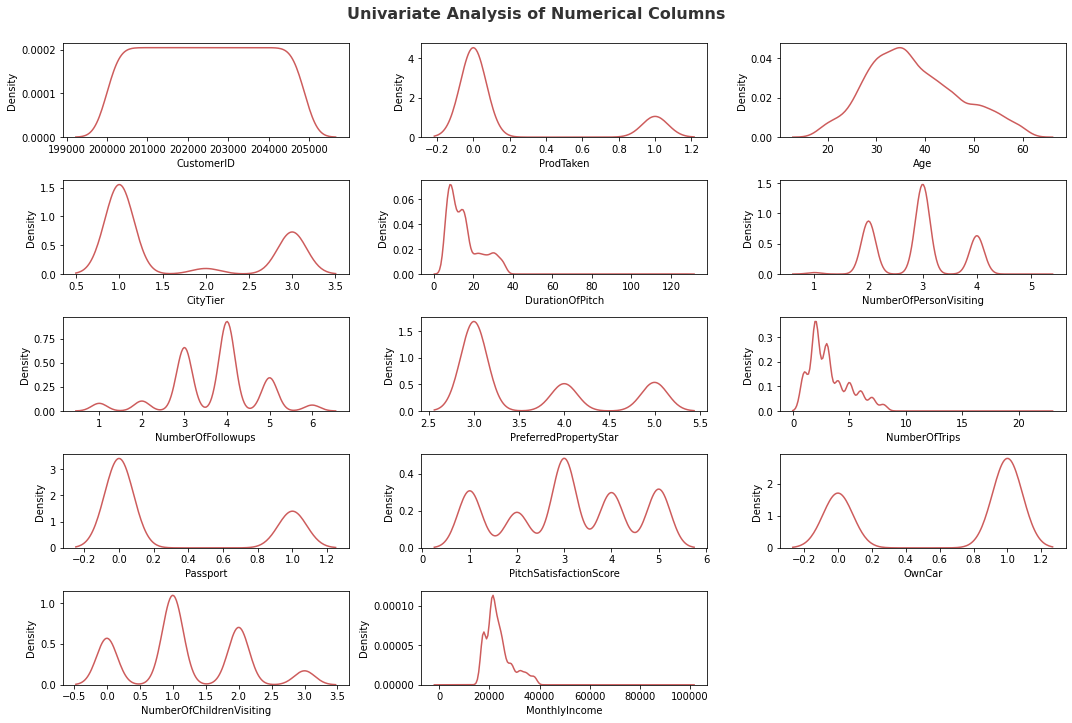

In [9]:
# numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
    
# save plot
plt.savefig('fig/univariate_analysis_num.png')

Dari hasil visualisasi tersebut dapat disimpulkan bahwa:
- Kolom `CustomerID` memiliki sebaran data yang terlalu banyak, mungkin dikarenakan pelanggan tiap baris selalu unik sehingga kolom tersebut bisa dihapus nantinya.
- Kolom `Age` sepertinya mendekati distribusi normal.
- Kolom `DurationOfPitch`, `NumberOfTrips`, dan `MonthlyIncome` sepertinya memiliki distribusi data **positive skewed** (menceng ke kanan) yang mengindikasikan terdapat outlier.
- Untuk kolom lain bisa diabaikan karena sejatinya termasuk jenis data diskrit atau ordinal.

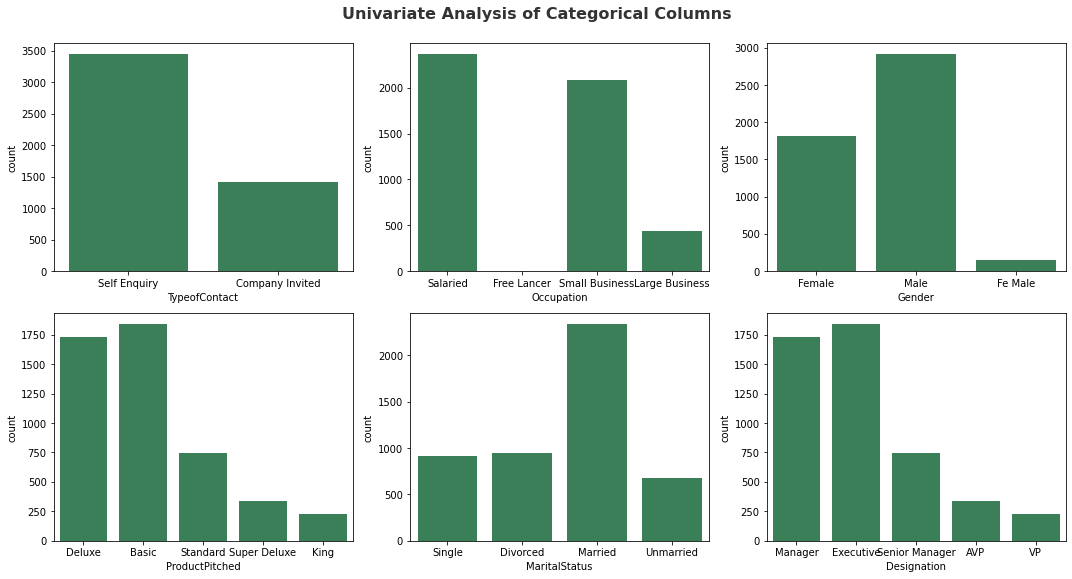

In [10]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='seagreen')
    plt.tight_layout()
    
# save plot
plt.savefig('fig/univariate_analysis_cat.png')

Dari hasil visualisasi diatas dapat disimpulkan bahwa:
- Pada kolom `TypeofContact` didominasi (proporsi data lebih dari 50%) oleh Self Enquiry.
- Pada kolom `Occupation` didominasi Salaried dan Small Business, namun jumlah Free Lancer terlalu sedikit jadi bisa dihapus nantinya.
- Pada kolom `Gender` jenis kelamin laki-laki lebih banyak dibandingkan perempuan. Selain itu terdapat kesalahan penulisan kategori Fe Male yang seharusnya Female.
- Pada kolom `ProductPitched` dan `Designation` didominasi 2 kategori.
- Pada kolom `MaritalStatus` didominasi oleh status Married. Lalu status Single dan Unmarried bisa diartikan sama sehingga bisa digabungkan.

## Multivariate Analysis

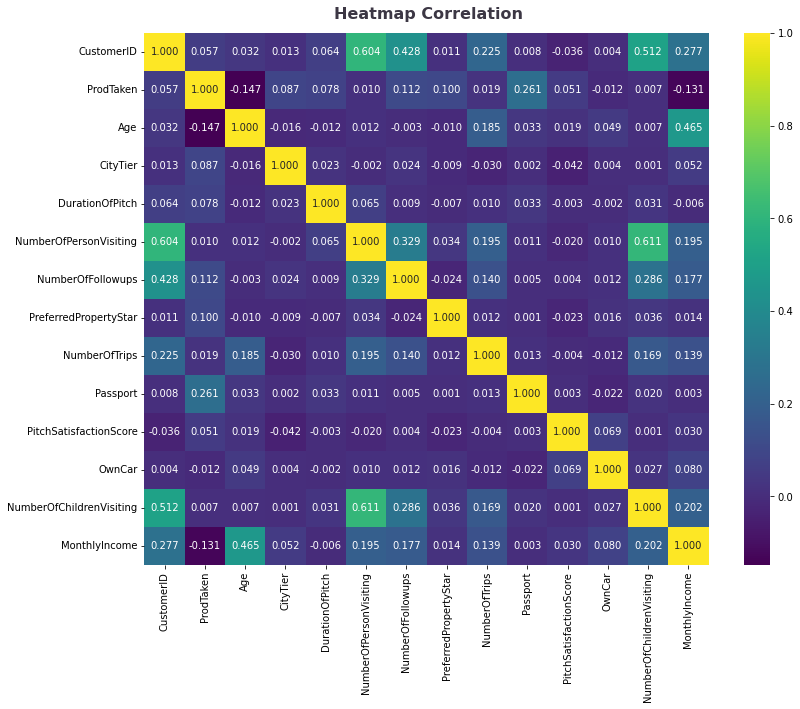

In [11]:
# Heatmap Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='viridis')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('fig/heatmap.png')

Dari hasil korelasi tersebut diketahui bahwa:
- Kolom target kita `ProdTaken` memiliki korelasi negatif lemah pada `Age` dan `MontlyIncome`.
- Kolom `NumberOfFollowups` dan `Passport` juga memiliki korelasi positif lemah terhadap `ProdTaken`.
- Kolom `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` memiliki korelasi positif cukup kuat sehingga bisa digabung menjadi fitur kolom baru.

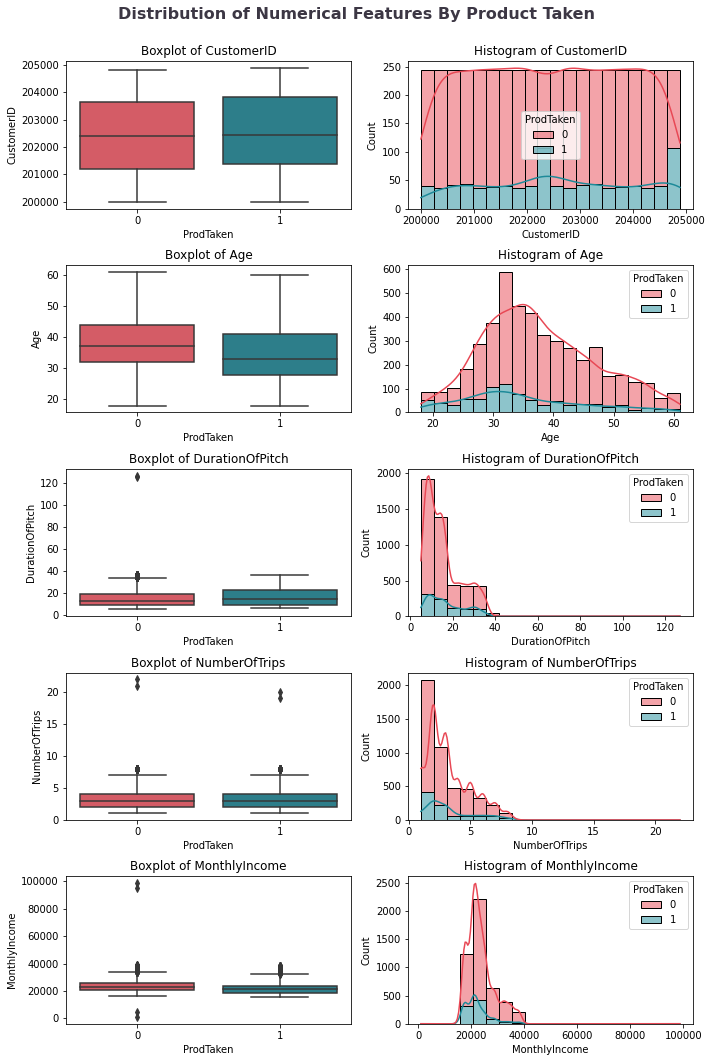

In [12]:
# EDA Numerical Features by Target
num_cols2 = ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(5, 2, figsize=(10,15))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):   
    sns.boxplot(data=df, x='ProdTaken', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('fig/multivariate_analysis_num.png')

Dari hasil visualisasi tersebut dapat disimpulkan bahwa:
- Pada kolom `CustomerID` karena datanya memiliki nilai unik tiap baris maka bisa diabaikan sebagai fitur.
- Customer yang membeli paket perjalanan kebanyakan berumur 20-35.
- Durasi Pitch yang dilakukan sales dibawah 20 menit memungkinkan customer untuk membeli paket perjalanan.
- Jumlah perjalanan yang pernah diambil customer kebanyakan tidak lebih 5 selama setahun.
- Customer dengan pendapatan bulanan berkisar 150000-250000 kemungkinan lebih tertarik membeli paket perjalanan.

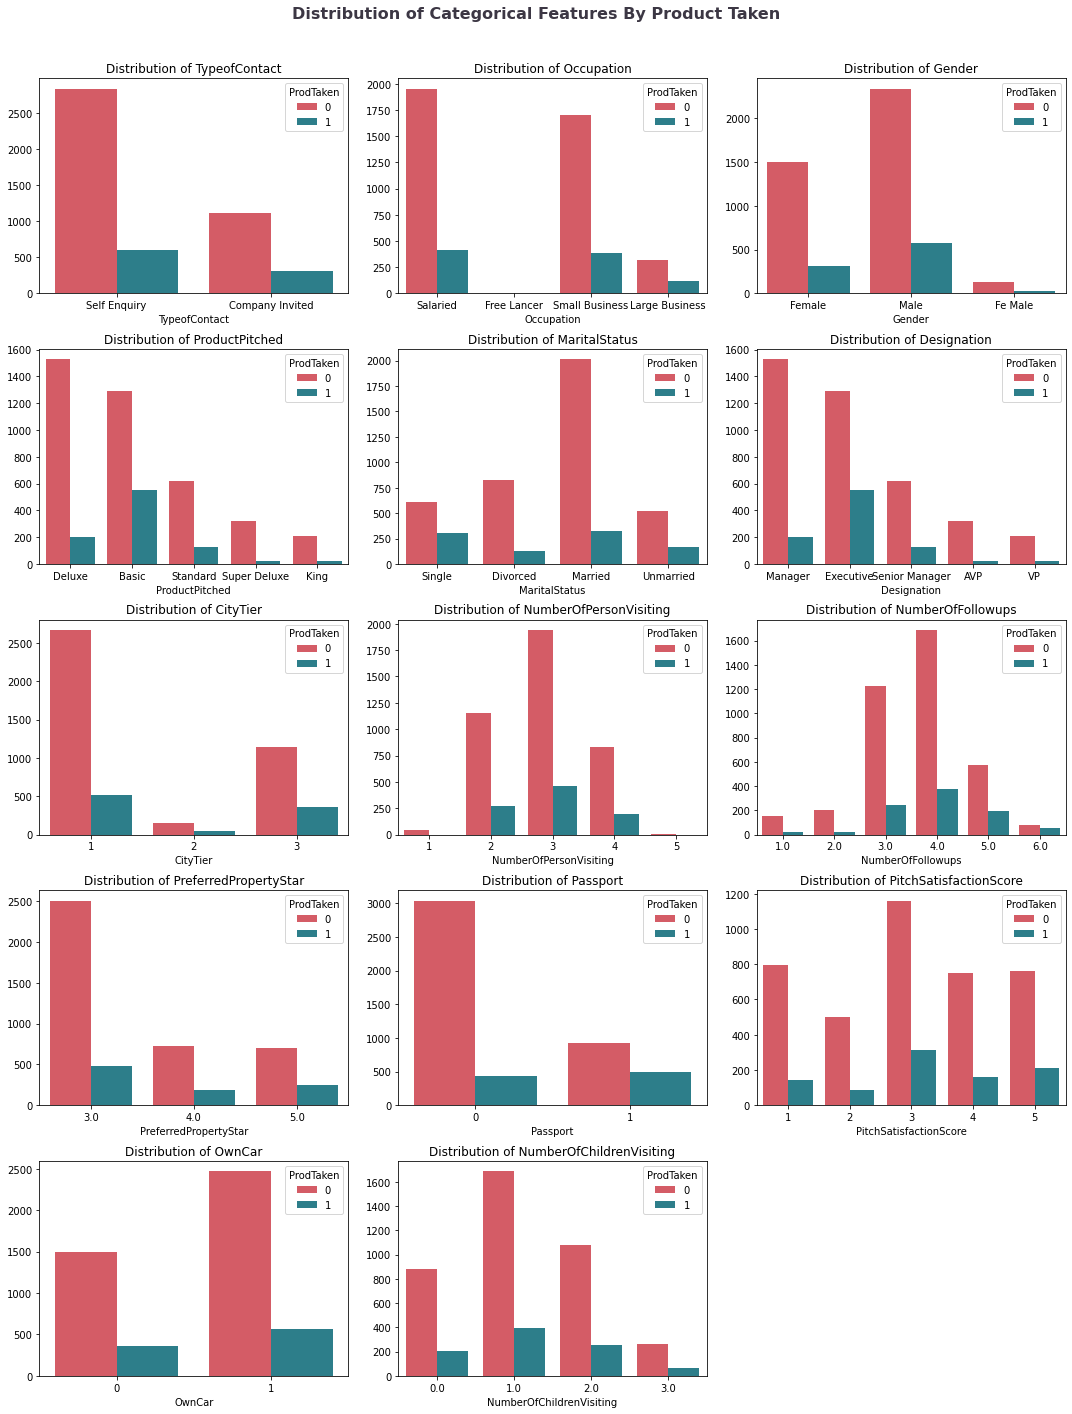

In [13]:
# EDA Categorical Features by Target
cat_cols2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
clr2 = ['#E84855', '#1D8A99']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Product Taken', color='#3C3744',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='ProdTaken', palette=clr2, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('fig/multivariate_analysis_cat.png')

Dari hasil visualisasi diatas dapat disimpulkan bahwa:
- Customer dengan tipe kontak Self Enquiry lebih tinggi untuk membeli paket perjalanan dibandingkan Company Invited.
- Customer dengan Occupation Salaried dan Small Business lebih tertarik membeli paket perjalanan, dan Free Lancer yang sudah pasti membeli paket perjalanan.
- Customer laki-laki lebih banyak membeli paket perjalanan dibandingkan perempuan.
- Jenis produk Basic yang ditawarkan sales ke customer lebih banyak dibeli.
- Customer yang Married maupun Single atau Unmarried lebih banyak untuk membeli paket perjalanan.
- Paket perjalanan yang ditawarkan kepada customer Executive lebih banyak dibeli.
- Customer yang berada di City Tier 1 dan 3 lebih tertarik membeli paket perjalanan.
- Jumlah orang yang akan bepergian 2-4 lebih banyak membeli paket perjalanan.
- Customer yang difollow up >=3 kali setelah pitching lebih banyak membeli paket perjalanan.
- Customer yang memberikan rating 3 pada properti hotel yang akan digunakan selama liburan lebih banyak membeli paket perjalanan.
- Customer yang memiliki passport sedikit lebih banyak membeli paket perjalanan.
- Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
- Customer yang memiliki mobil lebih banyak membeli paket perjalanan.
- Customer dengan jumlah anak dibawah 5 tahun adalah 0 atau 1 lebih banyak membeli paket perjalanan

In [14]:
# check correlation categorical columns to target
# H0 : Kolom kategorik tersebut tidak berkorelasi dengan target
# H1 : Kolom kategorik tersebut berkorelasi dengan target

from scipy.stats import chi2_contingency
chi2_check = []
for i in cat_cols:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,Gender,Fail to Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis
5,Designation,Reject Null Hypothesis


Dari hasil pengujian tersebut dapat disimpulkan bahwa:
- Kolom `Gender` mungkin tidak akan dimasukkan sebagai fitur karena Fail to Reject Null Hypothesis (artinya kolom tidak berkorelasi dengan target).
- Untuk kolom `TypeofContact`, `Occupation`, `ProductPitched`, `MaritalStatus`, dan `Designation` bisa dimasukkan sebagai fitur karena Reject Null Hypothesis (artinya kolom berkorelasi dengan target).

In [15]:
# check proportion target
prop_target = df['ProdTaken'].value_counts(normalize=True) * 100
print('Persentase customer yang tidak membeli paket perjalanan adalah {}%'.format(round(prop_target[0], 1)))
print('Persentase customer yang membeli paket perjalanan adalah {}%'.format(round(prop_target[1], 1)))

Persentase customer yang tidak membeli paket perjalanan adalah 81.2%
Persentase customer yang membeli paket perjalanan adalah 18.8%


## EDA Conclusion

Dari hasil EDA yang telah dilakukan dapat disimpulkan bahwa :
1. Nama kolom dan tipe data sudah sesuai , tetapi ada kesalahan data pada kolom `Gender` dan kesamaan makna data pada kolom `Marital Status`.
2. Terdapat *missing values* pada kolom `Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact`.
3. Terdapat outlier pada kolom `DurationOfPitch, NumberOfTrips, MonthlyIncome`.
4. Telah ditemukan baris yang duplikat pada dataset yang digunakan.
5. Kolom `CustomerID` bisa dihapus karena setiap baris memiliki customer id yang berbeda-beda.
6. Kolom `ProdTaken` adalah target yang akan diprediksi.
7. Kolom numerik yang terlihat memiliki korelasi terhadap target dapat digunakan sebagai fitur, yaitu `Age`, `MontlyIncome`, `NumberOfFollowups` dan `Passport`.
8. Kolom `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` memiliki korelasi positif cukup kuat sehingga bisa digabung untuk menjadi fitur baru (`TotalVisiting`).
9. Beberapa kolom numerik yang terlihat sama sekali tidak berkorelasi terdapat target dapat dihapus.
10. Pada kolom kategorik bisa dimasukkan fitur, yaitu `TypeofContact`, `Occupation`, `ProductPitched`, `MaritalStatus`, dan `Designation` karena berdasarkan hasil pengujian hypothesis menggunakan chi-square berhasil reject H0 (artinya berkorelasi dengan target).

# Business Insight

In [16]:
# copy dataframe
df2 = df.copy()

## Produk manakah yang membuat pelanggan tertarik membelinya?

In [17]:
df_product = df2.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(df2.groupby(['ProductPitched'])['CustomerID'].count(),on = 'ProductPitched')
df_product = df_product[df_product.ProdTaken==1].reset_index(drop=True)
df_product['%']=round(df_product.TotalCust/df_product.CustomerID*100,2)
df_product = df_product.sort_values(by='%',ascending=False)
df_product

,ProductPitched,ProdTaken,TotalCust,CustomerID,%
0,Basic,1,552,1842,29.97
3,Standard,1,124,742,16.71
1,Deluxe,1,204,1732,11.78
2,King,1,20,230,8.70
4,Super Deluxe,1,20,342,5.85


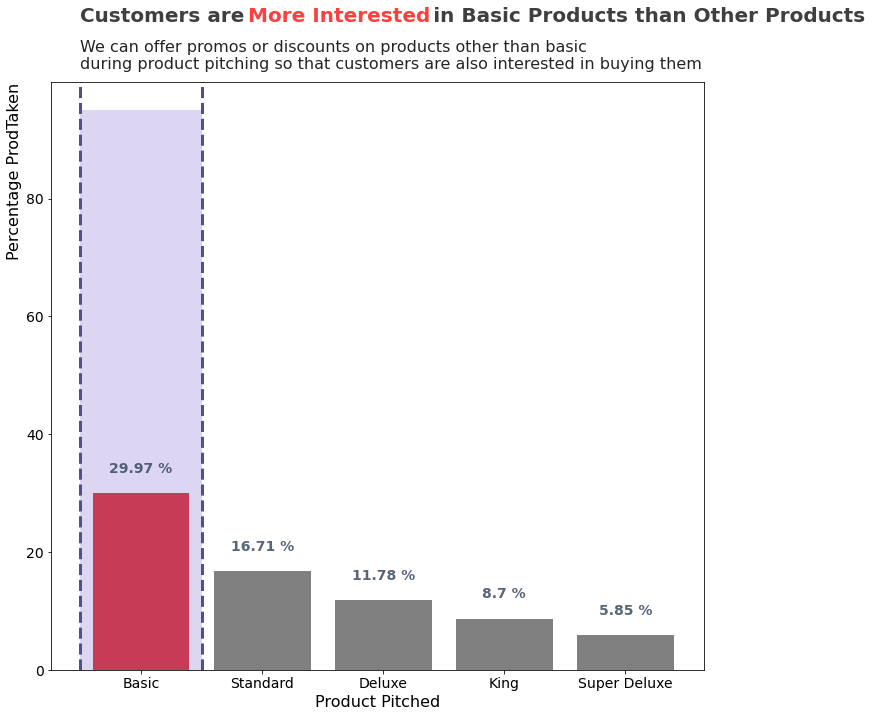

In [18]:
plt.figure(figsize=(12,10))

sns.barplot( x='ProductPitched',y='%',data=df_product, palette=['grey'])
sns.barplot( x='ProductPitched',y=[29.97,0,0,0,0],data=df_product, palette=['r'])

plt.xlabel('Product Pitched', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks(size=14)
plt.axvline(x=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(-0.5, 1.5 ,1), [[95]], colors='#907AD6', alpha=0.3)

data_bars = df_product.sort_values('%',ascending=False)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Customers are                           in Basic Products than Other Products', 
        x=-0.5, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                        More Interested',c='r', 
        x=-0.5, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='We can offer promos or discounts on products other than basic\nduring product pitching so that customers are also interested in buying them',
        x=-0.5, y=102, fontsize=16, alpha =.85)


plt.tight_layout()
plt.savefig('fig/insight1.png')
plt.show()


## Apakah jumlah follow up dari sales mempengaruhi pelanggan untuk membeli paket perjalanan? 

In [19]:
followup_total = pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken']).stack().reset_index(name='TotalCust')
followup_perc = round(pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken'], normalize='index')*100, 2)
followup_perc = followup_perc.stack().reset_index(name='PercCust')

df_followups = followup_total.merge(followup_perc, on=['NumberOfFollowups', 'ProdTaken'])
df_followups = df_followups[df_followups.ProdTaken==1].reset_index(drop=True)
df_followups

,NumberOfFollowups,ProdTaken,TotalCust,PercCust
0,1.0,1,20,11.36
1,2.0,1,24,10.48
2,3.0,1,244,16.64
3,4.0,1,379,18.33
4,5.0,1,191,24.87
5,6.0,1,54,39.71


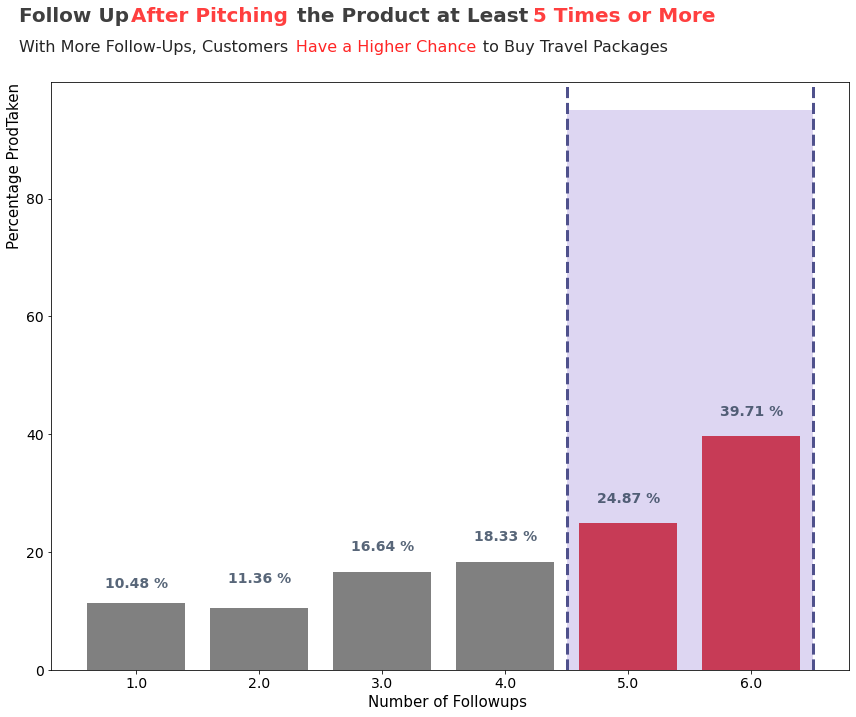

In [20]:
plt.figure(figsize=(12,10))

sns.barplot( x='NumberOfFollowups',y='PercCust',data=df_followups, palette=['grey'])
sns.barplot( x='NumberOfFollowups',y=[0,0,0,0,24.87,39.71],data=df_followups, palette=['r'])
plt.xlabel('Number of Followups ', fontsize=15)
plt.ylabel('Percentage ProdTaken', fontsize=15,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks(size=14)
plt.axvline(x=3.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=5.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(3.5, 6,0.5 ), [[95]], colors='#907AD6', alpha=0.3)

data_bars = df_followups.sort_values('PercCust',ascending=True)['PercCust'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Follow Up                        the Product at Least', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                After Pitching                                   5 Times or More', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='With More Follow-Ups, Customers                                      to Buy Travel Packages',
        x=-0.95, y=105, fontsize=16, alpha =.85)
plt.text(s='                                                      Have a Higher Chance',
        x=-0.95, y=105, fontsize=16, alpha =.85,c='r')

plt.tight_layout()
plt.savefig('fig/insight2.png')
plt.show()


## Kelompok umur manakah yang lebih banyak membeli paket perjalanan? 

Kategori umur menurut **Departemen Kesehatan Republik Indonesia** tahun 2009 yakni sebagai berikut :
- Masa balita usia 0 – 5 tahun
- Masa kanak-kanak usia 5 – 11 tahun
- Masa remaja awal usia 12 – 16 tahun
- Masa remaja akhir usia 17 – 25 tahun
- Masa dewasa awal usia 26 – 35 tahun
- Masa dewasa akhir usia 36 – 45 tahun
- Masa lansia awal usia 46 – 55 tahun
- Masa lansia akhir usia 56 – 65 tahun
- Masa manula usia 65 – ke atas

In [21]:
print('Age data is start from {} to {}'.format(int(df2['Age'].min()), int(df2['Age'].max())))

Age data is start from 18 to 61


Dari kategorisasi tersebut maka kami mengelompokkan data umur menjadi :
- Youth : 18 - 25 tahun
- Adult : 26 - 45 tahun
- Elderly : 46 - 61 tahun

In [22]:
def age_group(x):
    if x>=18 and x<=25:
        return 'Youth'
    elif x<=45:
        return 'Adult'
    else:
        return 'Elderly'
    
df2['AgeGroup'] = df2['Age'].apply(lambda x : age_group(x))
age_group = df2.groupby(['AgeGroup', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
             .merge(df2.groupby(['AgeGroup'])['CustomerID'].count().reset_index(name='TotalCust'),on='AgeGroup')

df_product = df_product.sort_values(by='%',ascending=False)
age_group['%']= round(age_group.TotalCust_x/age_group.TotalCust_y*100,2)
age_group = age_group[age_group.ProdTaken==1].sort_values('%',ascending=False).reset_index(drop=True)
age_group

,AgeGroup,ProdTaken,TotalCust_x,TotalCust_y,%
0,Youth,1,143,347,41.21
1,Adult,1,589,3341,17.63
2,Elderly,1,188,1200,15.67


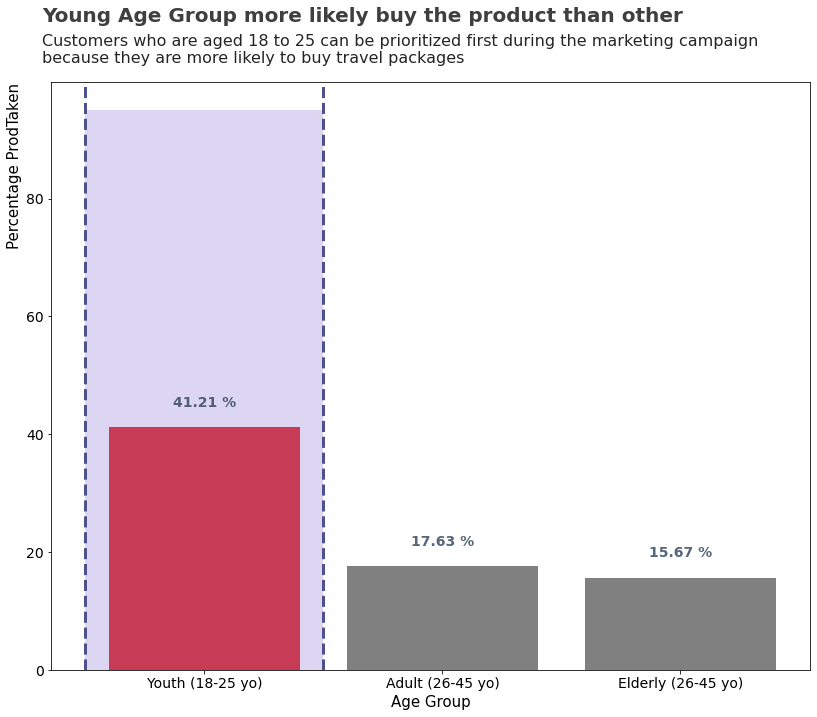

In [23]:
plt.figure(figsize=(12,10))

sns.barplot( x='AgeGroup',y='%',data=age_group, palette=['grey'])
sns.barplot( x='AgeGroup',y=[41.21,0,0],data=age_group, palette=['r'])

plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Percentage ProdTaken', fontsize=15,loc='top')
plt.yticks(range(0,110,20),size=14)
plt.xticks([0,1,2],['Youth (18-25 yo)','Adult (26-45 yo)','Elderly (26-45 yo)'],size=14)


plt.axvline(x=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(-0.5, 0.6,0.5 ), [[95]], colors='#907AD6', alpha=0.3)

data_bars = age_group.sort_values('%',ascending=False)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')

plt.text(s="Young Age Group more likely buy the product than other", 
        x=-0.68, y=110, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='Customers who are aged 18 to 25 can be prioritized first during the marketing campaign\nbecause they are more likely to buy travel packages',
        x=-0.68, y=103, fontsize=16, alpha =.85)
legend_labels, _= ax.get_legend_handles_labels()

plt.tight_layout()
plt.savefig('fig/insight3.png')
plt.show()


## Apakah semakin lama duration of pitch dan jumlah follow up dari sales mempengaruhi pelanggan untuk membeli paket perjalanan baru? 

In [24]:
df2.drop_duplicates(inplace=True)

In [25]:
_all = df2.groupby('DurationOfPitch')[['ProdTaken']].count()
yes = df2[df2['ProdTaken']==1].groupby('DurationOfPitch')[['ProdTaken']].count()
semua = yes.merge(_all,on='DurationOfPitch',how='left')
semua['%']=round((semua['ProdTaken_x']*100/semua['ProdTaken_y']),2)
semua.reset_index(inplace=True)#
# semua.sort_values(by='%',ascending=False,inplace=True)
semua = semua.head(30)
semua.iloc[13:26]

,DurationOfPitch,ProdTaken_x,ProdTaken_y,%
13,19.0,21,57,36.84
14,20.0,19,65,29.23
15,21.0,16,73,21.92
16,22.0,23,89,25.84
17,23.0,21,79,26.58
18,24.0,16,70,22.86
19,25.0,14,73,19.18
20,26.0,12,72,16.67
21,27.0,14,72,19.44
22,28.0,17,61,27.87


In [26]:
f_all = df2.groupby('NumberOfFollowups')[['ProdTaken']].count()
f_yes = df2[df2['ProdTaken']==1].groupby('NumberOfFollowups')[['ProdTaken']].count()
f_semua = f_yes.merge(f_all,on='NumberOfFollowups',how='left')
f_semua['%']=round((f_semua['ProdTaken_x']*100/f_semua['ProdTaken_y']),2)
f_semua.reset_index(inplace=True)#
f_semua.sort_values(by='%',ascending=False,inplace=True)
f_semua

,NumberOfFollowups,ProdTaken_x,ProdTaken_y,%
5,6.0,54,136,39.71
4,5.0,191,768,24.87
3,4.0,379,2068,18.33
2,3.0,244,1466,16.64
0,1.0,20,176,11.36
1,2.0,24,229,10.48


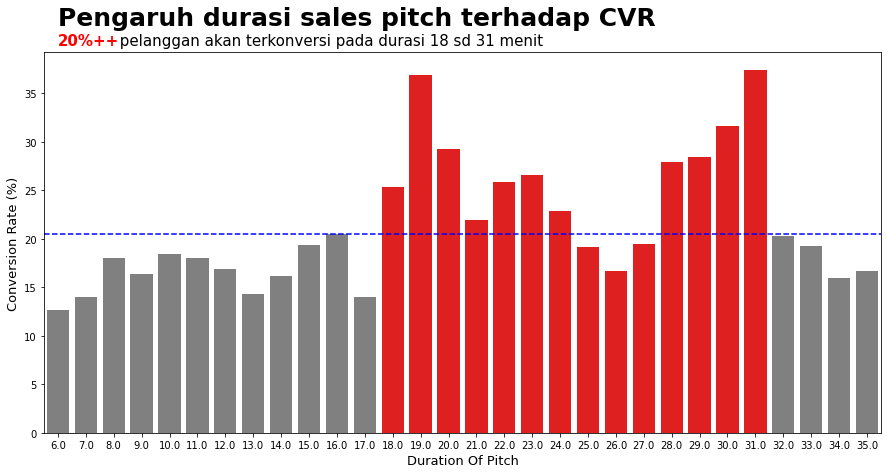

In [27]:
plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
sns.barplot(x='DurationOfPitch',y='%',data=semua,orient='v',order=semua['DurationOfPitch'],color='grey',saturation=0.3)
sns.barplot(x='DurationOfPitch',y='%',data=semua.iloc[12:26],orient='v',order=semua['DurationOfPitch'],color='r')
plt.ylabel('Conversion Rate (%)',size=13)
plt.xlabel('Duration Of Pitch',size=13)
plt.axhline(20.5, linestyle='dashed',color='b')
plt.text(0,42,'Pengaruh durasi sales pitch terhadap CVR',size=25,family='sans',weight='bold')
plt.text(0,40,s='             pelanggan akan terkonversi pada durasi 18 sd 31 menit',fontdict=({'size':15,'family':'sans'}))
plt.text(0,40,s='20%++',fontdict=({'size':15,'family':'sans'}),c='r',weight='bold')
plt.savefig('fig/insight4.png')
plt.show()

In [28]:
df_city = df2.groupby(['CityTier', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(df2.groupby(['CityTier'])['CustomerID'].count(),on = 'CityTier')
df_city = df_city[df_city.ProdTaken==1].reset_index(drop=True)
df_city['%']=round(df_city.TotalCust/df_city.CustomerID*100,2)
df_city = df_city.sort_values(by='%',ascending=False).reset_index(drop=True)
df_city

,CityTier,ProdTaken,TotalCust,CustomerID,%
0,3,1,354,1500,23.60
1,2,1,46,198,23.23
2,1,1,520,3190,16.30


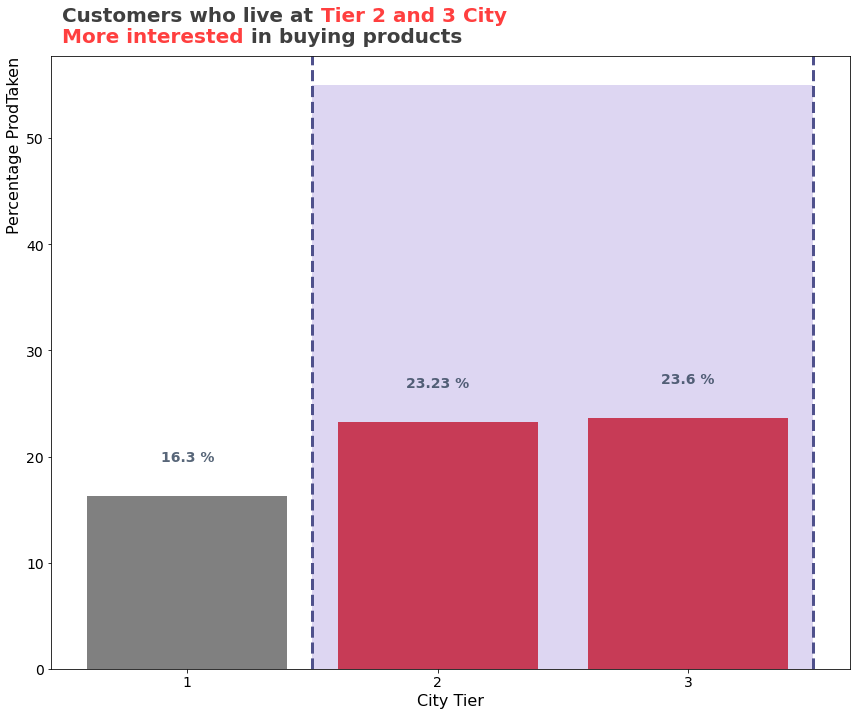

In [29]:
plt.figure(figsize=(12,10))

sns.barplot( x='CityTier',y='%',data=df_city, palette=['grey'])
sns.barplot( x='CityTier',y=[23.60,23.23,0],data=df_city, palette=['r'])

plt.xlabel('City Tier', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks(size=14)
plt.axvline(x=.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=2.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(0.5, 2.6 ,1), [[55]], colors='#907AD6', alpha=0.3)

data_bars = df_city.sort_values('%',ascending=True)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
plt.text(s='Customers who live at                            ', 
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75)
plt.text(s='                                     Tier 2 and 3 City                            ', 
        x=-0.5, y=61, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='More interested ', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='r')
plt.text(s='                           in buying products', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)

plt.tight_layout()
plt.savefig('fig/insight5.png')
plt.show()


In [30]:
df_passport = df2.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df2.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['%']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='%',ascending=False).reset_index(drop=True)
df_passport

,Passport,ProdTaken,CustomerID_x,CustomerID_y,%
0,1,1,494,1422,34.74
1,0,1,426,3466,12.29


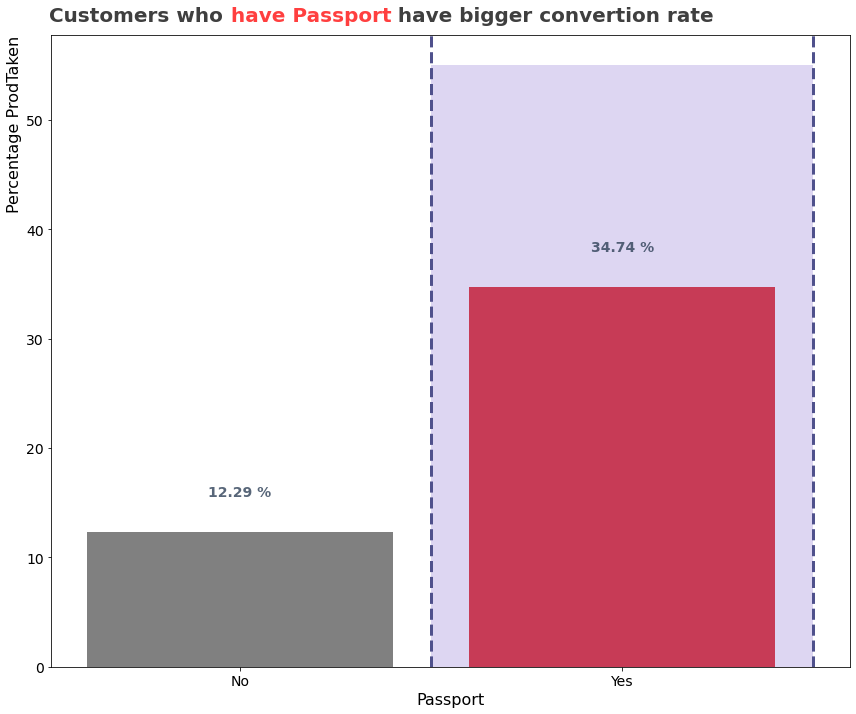

In [31]:
plt.figure(figsize=(12,10))

sns.barplot( x='Passport',y='%',data=df_passport, palette=['grey'])
sns.barplot( x='Passport',y=[34.74,0],data=df_passport, palette=['r'])

plt.xlabel('Passport', fontsize=16)
plt.ylabel('Percentage ProdTaken', fontsize=16,loc='top')
plt.yticks(range(0,68,10),size=14)
plt.xticks([1,0],labels = ['Yes','No'],size=14)
plt.axvline(x=.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='#4F518C', linestyle='--', linewidth=3)
plt.stackplot(np.arange(0.5, 1.6 ,1), [[55]], colors='#907AD6', alpha=0.3)

data_bars = df_passport.sort_values('%',ascending=True)['%'].values
for num, text in enumerate(data_bars):
    plt.text(x=num,y=text+3,s=str(text)+' %' ,fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')

plt.text(s='Customers who                         have bigger convertion rate', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,)
plt.text(s='                          have Passport', 
        x=-0.5, y=59, fontsize=20, fontweight='bold', alpha =.75,c='r')

plt.tight_layout()
plt.savefig('fig/insight6.png')
plt.show()

# Stage 2 Data Preprocessing

## Data Cleansing

In [32]:
# copy dataframe for preprocessing
df_prep = df.copy()

### Handling Inconsistent Data

In [33]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

print('Gender :', df_prep['Gender'].unique().tolist())
print('Marital Status:', df_prep['MaritalStatus'].unique().tolist())

Gender : ['Female', 'Male']
Marital Status: ['Unmarried', 'Divorced', 'Married']


### Handling Missing Values

In [34]:
# counts missing data
missing_cols = df_prep.columns[df_prep.isnull().any()]
df_prep[missing_cols].isnull().sum()

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [35]:
# statistics on numerical columns (missing cols)
df_prep[missing_cols].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [36]:
# statistics on categorical columns (missing cols)
df_prep[missing_cols].select_dtypes(include='object').describe()

,TypeofContact
count,4863
unique,2
top,Self Enquiry
freq,3444


Dari pengamatan yang sudah dilakukan saat EDA maka penanganan missing values yang digunakan, yaitu:
- Kolom `Age` akan diisi dengan nilai mean (disribusi data mendekati normal).
- Kolom `TypeofContact` akan diisi dengan nilai 'Unknown' (nilai modus sudah terlalu tinggi).
- Kolom `DurationOfPitch` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).
- Kolom `NumberOfFollowups` akan disi dengan nilai min (dianggap tidak ada follow up setelah pitching).
- Kolom `PreferredPropertyStar` akan diisi dengan nilai 3 (nilai rating yang moderate).
- Kolom `NumberOfTrips` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).
- Kolom `NumberOfChildrenVisiting` akan diisi dengan nilai 0 (dianggap tidak memiliki anak dibawah 5 tahun).
- Kolom `MonthlyIncome` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).

In [37]:
# handling missing values
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [38]:
# check again if any missing values
print('Apakah masih terdapat kolom dengan nilai null/missing values?', df_prep.isnull().any().any())

Apakah masih terdapat kolom dengan nilai null/missing values? False


### Handling Duplicate Data

In [39]:
# remove CustomerID to see duplicate rows
df_prep.drop('CustomerID', axis=1, inplace=True)
print(f'Jumlah baris sebelum difilter duplikat data adalah {df_prep.shape[0]}')

# remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print(f'Jumlah baris setelah difilter duplikat data adalah {df_prep.shape[0]}')

Jumlah baris sebelum difilter duplikat data adalah 4888
Jumlah baris setelah difilter duplikat data adalah 4747


### Handling Outlier

In [40]:
# view total rows before filtered
print(f'Jumlah baris sebelum memfilter outlier adalah {df_prep.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_prep))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries    

# view total rows after filtered
df_prep = df_prep[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier adalah {df_prep.shape[0]}')

Jumlah baris sebelum memfilter outlier adalah 4747
Jumlah baris setelah memfilter outlier adalah 4737


## Feature Engineering

### Feature Encoding

In [41]:
# view unique values on categorical columns
for col in df_prep.select_dtypes(include='object').columns:
    print(f'{col} : {df_prep[col].unique().tolist()}')
    print(df_prep[col].value_counts())
    print('------------------------------------------')

TypeofContact : ['Self Enquiry', 'Company Invited', 'Unknown']
Self Enquiry       3346
Company Invited    1366
Unknown              25
Name: TypeofContact, dtype: int64
------------------------------------------
Occupation : ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Salaried          2287
Small Business    2028
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------------------
Gender : ['Female', 'Male']
Male      2829
Female    1908
Name: Gender, dtype: int64
------------------------------------------
ProductPitched : ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
Basic           1794
Deluxe          1680
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
------------------------------------------
MaritalStatus : ['Unmarried', 'Divorced', 'Married']
Married      2277
Unmarried    1512
Divorced      948
Name: MaritalStatus, dtype: int64
--------------------

Dari hasil tersebut maka dapat disimpulkan bahwa:
- Pada kolom `Occupation` terlihat jumlah customer 'Free Lancer' terlalu sedikit sehingga dapat dihapus.
- Kolom `Gender` memiliki *unique values* berjumlah 2 maka dapat dilakukan Label Encoding.
- Kolom `ProductPitched` dan `Designation` memiliki *unique values* berjenis data ordinal maka dapat dilakukan Label Encoding.
- Kolom `TypeofContact`, `Occupation`, dan `MaritalStatus` memiliki unique values lebih dari 2 dan tidak berjenis data ordinal sehingga dilakukan One Hot Encoding.

In [42]:
# remove rows with Occupation is `Free Lancer`
df_prep = df_prep[df_prep['Occupation']!='Free Lancer']

# view dimension size of data before encoding
print(f'Dimensi data sebelum encoding adalah {df_prep.shape[0]} baris dan {df_prep.shape[1]} kolom')

# label encoding
df_prep['Gender'] = df_prep['Gender'].map({'Female':0, 'Male':1})
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager':0, 'Senior Manager':1, 'Executive':2,
                                                     'AVP':3, 'VP':4})

# one hot encoding
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(df_prep[col], prefix=col,drop_first=True) #menggunakan drop first = True untuk mengurangi dimensi
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)
    
# view dimension size of data before encoding
print(f'Dimensi data setelah encoding adalah {df_prep.shape[0]} baris dan {df_prep.shape[1]} kolom')

Dimensi data sebelum encoding adalah 4735 baris dan 19 kolom
Dimensi data setelah encoding adalah 4735 baris dan 22 kolom


### Feature Extraction

In [43]:
# get correlation > +- 0.5
df_corr = df_prep.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.595
ProductPitched with MonthlyIncome has correlation : 0.678
Occupation_Salaried with Occupation_Small Business has correlation : -0.837
MaritalStatus_Married with MaritalStatus_Unmarried has correlation : -0.659


In [44]:
# create new column for feature
df_prep['TotalVisiting'] = df_prep['NumberOfPersonVisiting'] + df_prep['NumberOfChildrenVisiting']
df_prep.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

## Split Train & Test Set

In [45]:
X = df_prep.drop('ProdTaken', axis=1)
y = df_prep['ProdTaken']

In [46]:
# splitting into data train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f'Jumlah data latih  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

print(f'Jumlah data uji terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_test==0)}')
print(f'Jumlah class 1 : {sum(y_test==1)}\n')

Jumlah data latih  terdiri dari 3788 baris
Jumlah class 0 : 3076
Jumlah class 1 : 712

Jumlah data uji terdiri dari 947 baris
Jumlah class 0 : 769
Jumlah class 1 : 178



### Feature Transformation

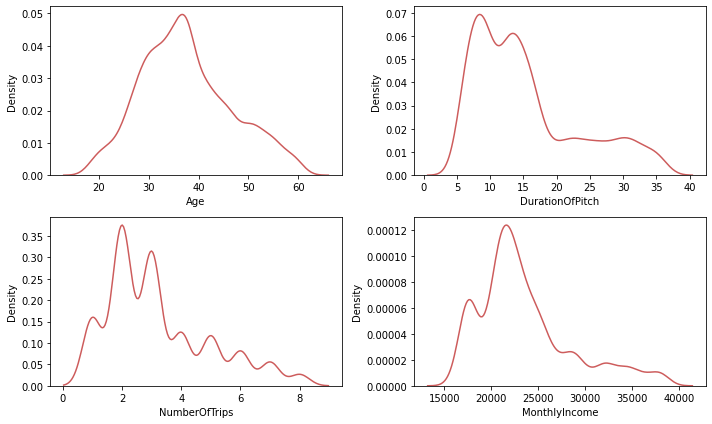

In [47]:
# distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_prep[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

Berdasarkan hasil visualiasi tersebut, maka:
- Kolom `Age` akan dilakukan scaling dengan Normalization karena mendekati distribusi normal.
- Kolom `NumberOfTrips` tidak dilakukan scaling karena nilai datanya tidak terlalu variatif setelah dihandling outlier.
- Kolom `DurationOfPitch` dan `MonthlyIncome` akan dilakukan scaling dengan Standardization karena sedikit skewed.

In [48]:
# scaling using normalization
scaler = MinMaxScaler()
scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# scaling using standardization
scaler = StandardScaler()
scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))


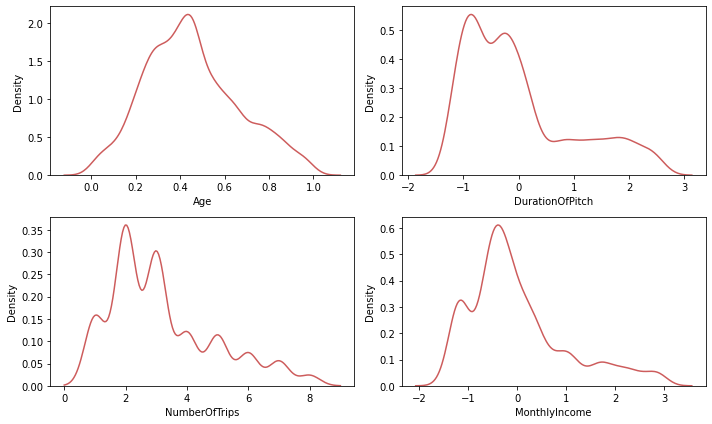

In [49]:
# distribution of data after scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [50]:
# statistics data after transformation
X_train[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3788.000000,3788.000000,3788.000000,3.788000e+03
mean,0.453387,0.000000,3.197202,-3.170056e-16
std,0.210871,1.000132,1.745316,1.000132e+00
min,0.000000,-1.283932,1.000000,-1.492633e+00
25%,0.302326,-0.788172,2.000000,-6.095633e-01
50%,0.441860,-0.292411,3.000000,-2.373719e-01
75%,0.581395,0.451230,4.000000,3.789695e-01
max,1.000000,2.558212,8.000000,2.991687e+00


Dari hasil statistik tersebut diketahui bahwa:
- Kolom `Age` memiliki nilai min = 0 dan nilai max = 0 setelah dilakukan normalisasi.
- Kolom `NumberOfTrips` memiliki nilai min = 1 dan nilai max = 8 dianggap tidak terlalu variatif range datanya. 
- Kolom `DurationOfPitch` dan `MonthlyIncome` memiliki nilai mean = -1 dan nilai standar deviasi = 1 setelah dilakukan standardisasi

### Feature Selection

In [51]:
# Feature selection using Variance threshold
vars = VarianceThreshold(0.2)
vars.fit(X_train)
X_train_fs = pd.DataFrame(vars.transform(X_train),columns=vars.get_feature_names_out())
X_test_fs = pd.DataFrame(vars.transform(X_test),columns=vars.get_feature_names_out())

In [52]:
# Feature selection using fclassif for numerical feature
nume_cols = ['DurationOfPitch','NumberOfFollowups','NumberOfTrips','MonthlyIncome','TotalVisiting']

classif = SelectKBest(f_classif,k=4)
classif.fit(X_train_fs[nume_cols],y_train)
X_train_fnum = pd.DataFrame(classif.transform(X_train_fs[nume_cols]),columns=classif.get_feature_names_out())
X_test_fnum = pd.DataFrame(classif.transform(X_test_fs[nume_cols]),columns=classif.get_feature_names_out())

In [53]:
# Feature selection using chi2 for categorical feature
cate_cols = ['CityTier','Gender','ProductPitched','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar','Designation',
 'TypeofContact_Self Enquiry','Occupation_Salaried','Occupation_Small Business','MaritalStatus_Married','MaritalStatus_Unmarried',]

chi2 = SelectKBest(chi2,k=8)
chi2.fit(X_train_fs[cate_cols],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cate_cols]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cate_cols]),columns=chi2.get_feature_names_out())

In [54]:
# merging all feature selection result
all_coll = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[all_coll]
X_test = X_test[all_coll]

print(f'Feature hasil seleksi adalah : {all_coll}')

Feature hasil seleksi adalah : ['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'CityTier', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'Designation', 'MaritalStatus_Married', 'MaritalStatus_Unmarried']


### Handling imbalance data

In [55]:
print(f'Jumlah data uji sebelum SMOTE terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

smote = SMOTE(0.5,random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)

print(f'Jumlah data uji setelah SMOTE terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

Jumlah data uji sebelum SMOTE terdiri dari 3788 baris
Jumlah class 0 : 3076
Jumlah class 1 : 712

Jumlah data uji setelah SMOTE terdiri dari 947 baris
Jumlah class 0 : 3076
Jumlah class 1 : 1538



In [56]:
# save file preprocessing into csv
X_train.to_csv('Travel_Preprocessing_train.csv', index=False)
X_test.to_csv('Travel_Preprocessing_test.csv', index=False)

# Stage 3 Machine Learning Modelling & Evaluation

# Data Modelling #1

Disini kita akan menggunakan 12 fitur hasil feature selection menggunakan variance threshold, fclassif dan chi square

## Model Selection

In [57]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
    
    print(f'Dari model {title} didapatkan bahwa:')
    print(f'- Jumlah TP (True Positive) = {cm[1][1]}')
    print(f'- Jumlah TN (True Negative) = {cm[0][0]}')
    print(f'- Jumlah FP (False Positive) = {cm[0][1]}')
    print(f'- Jumlah FN (False Negative) = {cm[1][0]}')

### 1. Logistic Regression

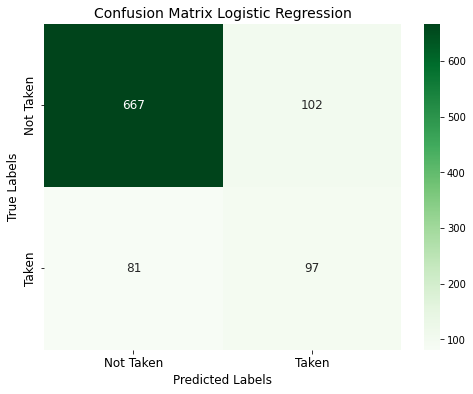

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 97
- Jumlah TN (True Negative) = 667
- Jumlah FP (False Positive) = 102
- Jumlah FN (False Negative) = 81


In [58]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

### 2. Decision Tree

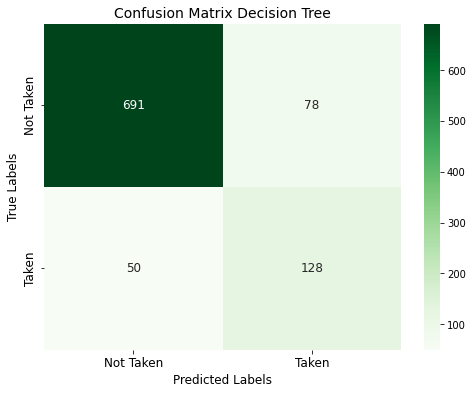

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 128
- Jumlah TN (True Negative) = 691
- Jumlah FP (False Positive) = 78
- Jumlah FN (False Negative) = 50


In [59]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

### 3. Random Forest

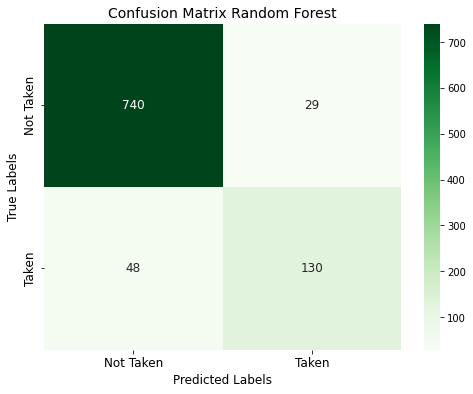

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 130
- Jumlah TN (True Negative) = 740
- Jumlah FP (False Positive) = 29
- Jumlah FN (False Negative) = 48


In [60]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

### 4. AdaBoost

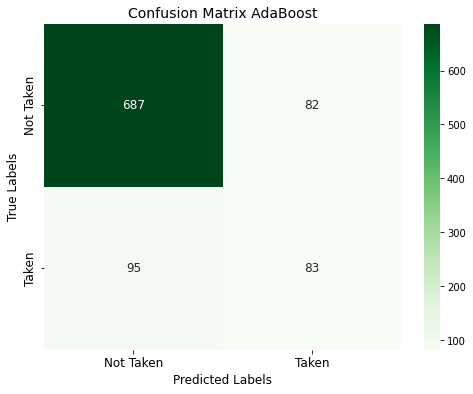

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 83
- Jumlah TN (True Negative) = 687
- Jumlah FP (False Positive) = 82
- Jumlah FN (False Negative) = 95


In [61]:
model_adb = AdaBoostClassifier(random_state=42)
model_adb.fit(X_train, y_train)

plotting_confusion_matrix(model_adb, X_test, y_test, title='AdaBoost')

### 5. XGBoost

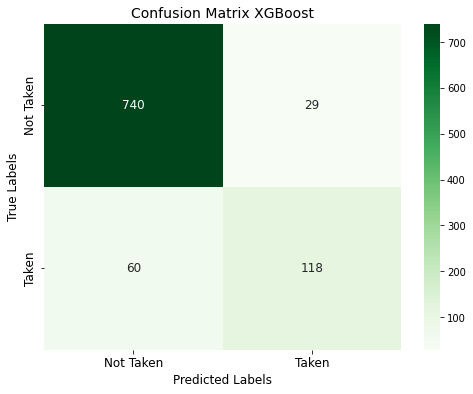

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 118
- Jumlah TN (True Negative) = 740
- Jumlah FP (False Positive) = 29
- Jumlah FN (False Negative) = 60


In [62]:
model_xgb = XGBClassifier(verbosity=0, random_state=42)
model_xgb.fit(X_train, y_train)

plotting_confusion_matrix(model_xgb, X_test, y_test, title='XGBoost')

## Model Evaluation

Pada kasus kita bertujuan untuk memprediksi apakah pelanggan akan membeli paket perjalanan berdasarkan data yang tersedia kemungkinan masih ada pelanggan yang potensial untuk terkonversi membeli paket perjalanan, maka:
- Metric evaluasi yang akan kita fokuskan adalah **Accuracy** dimana kita ingin mempertimbangkan ketepatan dalam memprediksi.

In [63]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [64]:
# scoring base model
model_list_base = [model_lr, model_dt, model_rf, model_adb, model_xgb]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8068,0.4874,0.5449,0.5146,0.3954,0.8021,0.7961
1,Decision Tree,0.8648,0.6214,0.7191,0.6667,0.5849,0.8088,1.0000
2,Random Forest,0.9187,0.8176,0.7303,0.7715,0.7240,0.9503,1.0000
3,AdaBoost,0.8131,0.5030,0.4663,0.4840,0.3704,0.7857,0.8593
4,XGBoost,0.9060,0.8027,0.6629,0.7262,0.6745,0.9361,0.9998


Dari hasil evaluasi kelima model tersebut didapatkan bahwa:
- **Model Logistic Regression** mampu menghasilkan Accuracy cukup  yaitu 80.68%.
- **Model Decision Tree** mampu mneghasilkan Accuracy cukup tinggi yaitu 86.48%.
- **Model Random Forest** mampu menghasilkan Accuracy sangat tinggi yaitu 91.87%.
- **Model AdaBoost** mampu menghasilkan Accuracy cukup tinggi yaitu 81.31%.
- **Model XGBoost** mampu menghasilkan Accuracy yang cukup tinggi yaitu 90.60%.

Maka dapat disimpulkan dari kelima model yang dipilih,sementara **Model Random Forest** merupakan base model terbaik, namun kita masih harus melakukan tuning lanjutan agar tidak terjadi overfitting.

## Hyperparameter Tuning

In [65]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    }, 
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], 
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

### 1. Logistic Regression

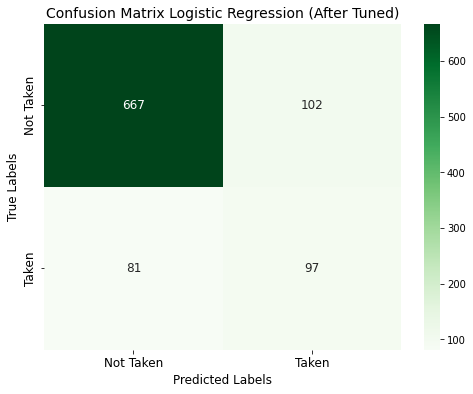

Dari model Logistic Regression (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 97
- Jumlah TN (True Negative) = 667
- Jumlah FP (False Positive) = 102
- Jumlah FN (False Negative) = 81


In [66]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='accuracy', random_state=42)
tuned_lr.fit(X_train, y_train)

plotting_confusion_matrix(tuned_lr, X_test, y_test, title='Logistic Regression (After Tuned)')

In [67]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_lr, list_hyperparameters[0])
print('=====================================================')
eval_after_hyperparameter_tuning(tuned_lr, X_train, y_train, X_test, y_test)

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 6.158482110660261
Accuracy: 0.8068
Precision: 0.4874
Recall: 0.5449
F1 Score: 0.5146
AUC (Test): 0.3954
AUC (Train): 0.8022


### 2. Decision Tree

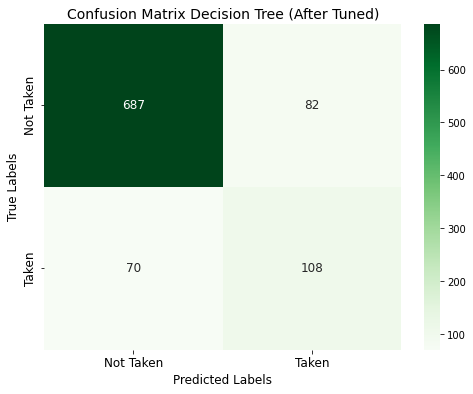

Dari model Decision Tree (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 108
- Jumlah TN (True Negative) = 687
- Jumlah FP (False Positive) = 82
- Jumlah FN (False Negative) = 70


In [68]:
model_dt = DecisionTreeClassifier(random_state=42)
tuned_dt = RandomizedSearchCV(model_dt, list_hyperparameters[1], cv=5, scoring='accuracy', random_state=42)
tuned_dt.fit(X_train, y_train)

plotting_confusion_matrix(tuned_dt, X_test, y_test, title='Decision Tree (After Tuned)')

In [69]:
print('MODEL DECISION TREE AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_dt, list_hyperparameters[1])
print('===============================================')
eval_after_hyperparameter_tuning(tuned_dt, X_train, y_train, X_test, y_test)

MODEL DECISION TREE AFTER HYPERPARAMETER TUNING
Best max_depth: 80
Best min_samples_split: 6
Best min_samples_leaf: 1
Best max_features: sqrt
Accuracy: 0.8395
Precision: 0.5684
Recall: 0.6067
F1 Score: 0.587
AUC (Test): 0.4879
AUC (Train): 0.814


### 3. Random Forest

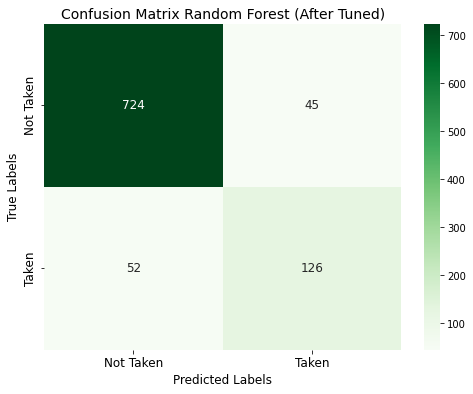

Dari model Random Forest (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 126
- Jumlah TN (True Negative) = 724
- Jumlah FP (False Positive) = 45
- Jumlah FN (False Negative) = 52


In [70]:
model_rf = RandomForestClassifier(random_state=42)
tuned_rf = RandomizedSearchCV(model_rf, list_hyperparameters[2], cv=5, scoring='accuracy', random_state=42)
tuned_rf.fit(X_train, y_train)

plotting_confusion_matrix(tuned_rf, X_test, y_test, title='Random Forest (After Tuned)')

In [71]:
print('MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_rf, list_hyperparameters[2])
print('===============================================')
eval_after_hyperparameter_tuning(tuned_rf, X_train, y_train, X_test, y_test)

MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING
Best n_estimators: 709
Best max_features: log2
Best max_depth: 50
Best criterion: entropy
Best min_samples_split: 6
Best min_samples_leaf: 1
Best class_weight: balanced
Best oob_score: True
Accuracy: 0.8976
Precision: 0.7368
Recall: 0.7079
F1 Score: 0.7221
AUC (Test): 0.6595
AUC (Train): 0.9425


### 4. AdaBoost

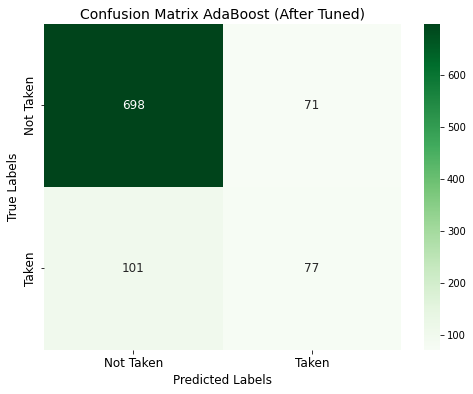

Dari model AdaBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 77
- Jumlah TN (True Negative) = 698
- Jumlah FP (False Positive) = 71
- Jumlah FN (False Negative) = 101


In [72]:
model_adb = AdaBoostClassifier(random_state=42)
tuned_adb = RandomizedSearchCV(model_adb, list_hyperparameters[3], cv=5, scoring='accuracy', random_state=42)
tuned_adb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_adb, X_test, y_test, title='AdaBoost (After Tuned)')

In [73]:
print('MODEL ADABOOST AFTER HYPERPARAMETER TUNING')
print('==========================================')
show_best_hyperparameter(tuned_adb, list_hyperparameters[3])
print('==========================================')
eval_after_hyperparameter_tuning(tuned_adb, X_train, y_train, X_test, y_test)

MODEL ADABOOST AFTER HYPERPARAMETER TUNING
Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R
Accuracy: 0.8184
Precision: 0.5203
Recall: 0.4326
F1 Score: 0.4724
AUC (Test): 0.3661
AUC (Train): 0.7885


### 5. XGBoost

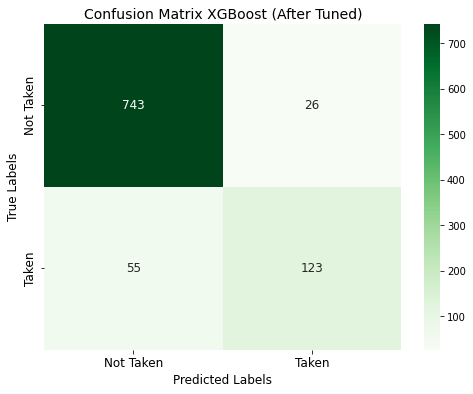

Dari model XGBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 123
- Jumlah TN (True Negative) = 743
- Jumlah FP (False Positive) = 26
- Jumlah FN (False Negative) = 55


In [74]:
model_xgb = XGBClassifier(random_state=42, verbosity=0)
tuned_xgb = RandomizedSearchCV(model_xgb, list_hyperparameters[-1], cv=5, scoring='accuracy', random_state=42)
tuned_xgb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_xgb, X_test, y_test, title='XGBoost (After Tuned)')

In [75]:
print('MODEL XGBOOST AFTER HYPERPARAMETER TUNING')
print('=========================================')
show_best_hyperparameter(tuned_xgb, list_hyperparameters[-1])
print('=========================================')
eval_after_hyperparameter_tuning(tuned_xgb, X_train, y_train, X_test, y_test)

MODEL XGBOOST AFTER HYPERPARAMETER TUNING
Best max_depth: 14
Best min_child_weight: 3
Best gamma: 0.4
Best tree_method: hist
Best colsample_bytree: 0.7000000000000001
Best learning_rate: 0.5757575757575758
Best reg_lambda: 0.8
Best reg_alpha: 0.4
Accuracy: 0.9145
Precision: 0.8255
Recall: 0.691
F1 Score: 0.7523
AUC (Test): 0.7051
AUC (Train): 0.9403


In [76]:
# base model
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8068,0.4874,0.5449,0.5146,0.3954,0.8021,0.7961
1,Decision Tree,0.8648,0.6214,0.7191,0.6667,0.5849,0.8088,1.0000
2,Random Forest,0.9187,0.8176,0.7303,0.7715,0.7240,0.9503,1.0000
3,AdaBoost,0.8131,0.5030,0.4663,0.4840,0.3704,0.7857,0.8593
4,XGBoost,0.9060,0.8027,0.6629,0.7262,0.6745,0.9361,0.9998


In [77]:
# tuned model
model_list_tuned = [tuned_lr, tuned_dt, tuned_rf, tuned_adb, tuned_xgb]
score_all_classification(model_list_tuned, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.8068,0.4874,0.5449,0.5146,0.3954,0.8022,0.7961
1,Decision Tree,0.8395,0.5684,0.6067,0.5870,0.4879,0.8140,0.9937
2,Random Forest,0.8976,0.7368,0.7079,0.7221,0.6595,0.9425,0.9998
3,AdaBoost,0.8184,0.5203,0.4326,0.4724,0.3661,0.7885,0.8619
4,XGBoost,0.9145,0.8255,0.6910,0.7523,0.7051,0.9403,1.0000


In [78]:
#Check Overfitting and Underfitting
def checkoverfit(model,x_train,x_test,title):
    cek = pd.DataFrame({
        'Model': title,
        'accuracy_score_train':[accuracy_score(y_train,model.predict(x_train))],
        'accuracy_score_test' :[accuracy_score(y_test,model.predict(x_test))],
        'accuracy_score_cv' : [model.best_score_]
        })
    return cek
checkoverfit(tuned_xgb,X_train,X_test,'XGBoost Classifier')

,Model,accuracy_score_train,accuracy_score_test,accuracy_score_cv
0,XGBoost Classifier,0.998483,0.914467,0.912664


Dari hasil evaluasi tersebut dapat disimpulkan bahwa:
- **Model Logistic Regression** menghasilkan Accuracy 80.68% dimana hasilnya sama dengan sebelum dituning hyperparameternya.
- **Model Decision Tree** menghasilkan Accuracy 83.95% dimana hasilnya turun sekitar 2% setelah dituning hyperparameternya.
- **Model Random Forest** menghasilkan Accuracy 89.76% dimana hasilnya turun sekitar 2% setelah dituning hyperparameternya.
- **Model AdaBoost** menghasilkan Accuracy 81.84% dimana hasilnya turun sekitar 1% setelah dituning hyperparameternya.
- **Model XGBoost** menghasilkan F1 Score 91.45% dimana hasilnya naik sekitar 1% setelah dituning hyperparameternya.

Dari hasil kelima model tersebut, maka dapat disimpulkan model **XGBoost** tetap menjadi model yang terbaik dengan Accuracy paling tinggi yaitu **91.44%** dan hasil scoring metric yang lain juga lebih unggul dengan hyperparameter tuning yang telah dilakukan dan tidak overfit.

# Modelling Conclusion

1. Dari serangkaian modelling yang telah dilakukan, model dengan feature selection berdasarkan feature importance memberikan hasil yang lebih bagus dimana 12 fitur tersebut antara lain **DurationOfPitch, NumberOfFollowups, NumberOfTrips, MonthlyIncome, CityTier, ProductPitched, PreferredPropertyStar, Passport, PitchSatisfactionScore, Designation, MaritalStatus_Married, MaritalStatus_Unmarried**.

2. Model yang memberikan hasil terbaik yaitu model **XGBoost dengan Accuracy 91.45%** dimana telah dilakukan hyperparameter tuning dengan mempertimbangkan nilai metric yang lain. Model ini nantinya akan digunakan untuk menganalisis fitur-fitur yang lebih mendominasi untuk dijadikan insight dan hasil prediksi model akan digunakan sebagai acuan bisnis kami.

# Stage 4 Insights and Recommendation

# Modelling Insights

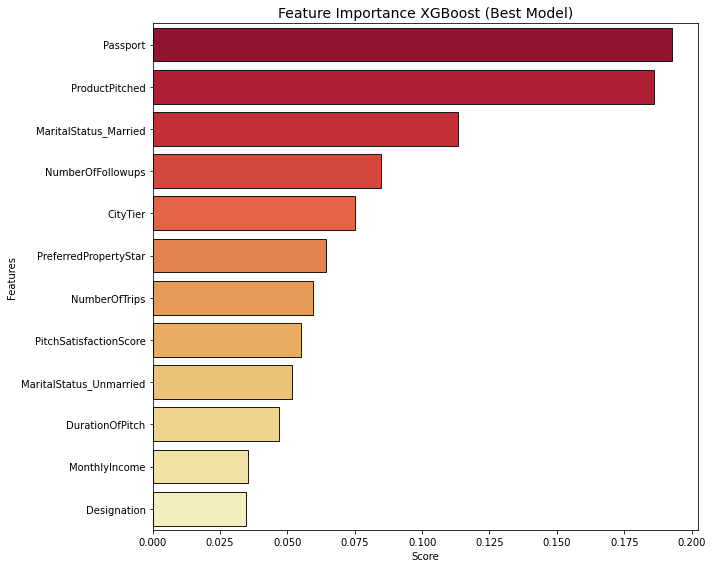

In [79]:
# feature importance using best model
feature_importance_rf = pd.Series(tuned_xgb.best_estimator_.feature_importances_, index=X_train.columns)
df_feature = feature_importance_rf.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='YlOrRd_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance XGBoost (Best Model)', fontsize=14)
plt.tight_layout()
plt.savefig('fig/feature_importance.png')
plt.show()

In [80]:
# combine prediction labels into test data
df_final_test = X_test.copy()
best_model = tuned_xgb.best_estimator_
df_final_test['ProdTaken'] = y_test
df_final_test['ProdTaken_Pred'] = best_model.predict(X_test)
df_final_test['ProdTaken_PredProba'] = best_model.predict_proba(X_test)[:,1]
df_final_test.head()

,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,CityTier,ProductPitched,PreferredPropertyStar,Passport,PitchSatisfactionScore,Designation,MaritalStatus_Married,MaritalStatus_Unmarried,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
3386,0.203350,4.0,5.0,0.440960,1,1,3.0,0,3,1,0,0,0,0,0.110418
1649,-0.044531,3.0,2.0,-1.239323,1,0,3.0,0,1,2,0,1,0,0,0.002180
3675,0.575170,4.0,8.0,0.137543,1,2,4.0,0,4,0,0,1,0,0,0.435671
3517,2.558212,6.0,3.0,0.333021,1,2,4.0,0,1,0,0,0,0,0,0.099017
1777,1.938511,4.0,4.0,0.696251,1,1,4.0,0,3,1,1,0,0,0,0.216005


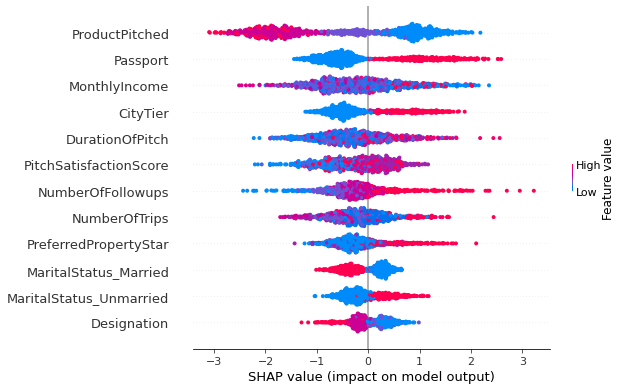

<Figure size 432x288 with 0 Axes>

In [81]:
explainer = shap.TreeExplainer(tuned_xgb.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.savefig('fig/shap.png')

    Dari observasi SHAP diatas diketahui bahwa:
        1. jika memiliki pasport, tinggal di city tier 3 dan belum menikah akan bernilai positif pada model (membeli).
        2. pemilihan produk basic yang di pitch dan semakin di followup maka semakin bernilai positif dengan model.

## Gain Lift Analysis

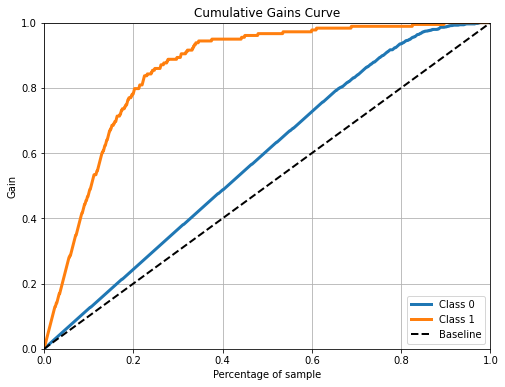

In [82]:
skplt.metrics.plot_cumulative_gain(df_final_test['ProdTaken'],tuned_xgb.predict_proba(X_test),figsize=(8,6))
plt.savefig('fig/gain.png')
plt.show()

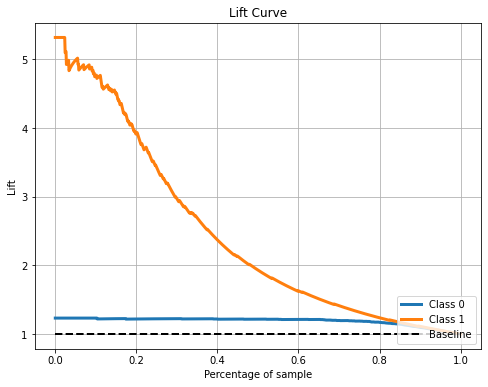

In [83]:
skplt.metrics.plot_lift_curve(df_final_test['ProdTaken'],tuned_xgb.predict_proba(X_test),figsize=(8,6))
plt.savefig('fig/lift.png')
plt.show()

    Diketahui dari tabel diatas jika menggunakan 20% dari tabel gain model ini dapat memprediksi 80% dari seluruh responds yang ada. Dan dari tabel lift kita bisa lihat jika menggunakan 20% dari data maka performancenya 4x lipat daripada nilai acaknya. bisa disimbulkan bahwa model ini sangat baik dalam memprediksi dan bukan hanya kebetulan saja.

# Business Impact

## Marketing Cost

In [84]:
df_final_test.head()

,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,CityTier,ProductPitched,PreferredPropertyStar,Passport,PitchSatisfactionScore,Designation,MaritalStatus_Married,MaritalStatus_Unmarried,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
3386,0.203350,4.0,5.0,0.440960,1,1,3.0,0,3,1,0,0,0,0,0.110418
1649,-0.044531,3.0,2.0,-1.239323,1,0,3.0,0,1,2,0,1,0,0,0.002180
3675,0.575170,4.0,8.0,0.137543,1,2,4.0,0,4,0,0,1,0,0,0.435671
3517,2.558212,6.0,3.0,0.333021,1,2,4.0,0,1,0,0,0,0,0,0.099017
1777,1.938511,4.0,4.0,0.696251,1,1,4.0,0,3,1,1,0,0,0,0.216005


In [85]:
cost_per_person = 60 # in usd 
cost_before = df_final_test[df_final_test.NumberOfFollowups!=0].shape[0]*cost_per_person
cost_after = df_final_test[(df_final_test.ProdTaken_Pred==1)].shape[0]*cost_per_person
cost_diff = cost_before - cost_after

print(f'Biaya marketing yang dibutuhkan sebelum menggunakan model adalah ${cost_before} USD')
print(f'Biaya marketing yang dibutuhkan setelah menggunakan model adalah ${cost_after} USD')
print(f'Jadi dengan model yang kami buat dapat mengurangi biaya marketing sebanyak ${cost_diff} USD atau turun sebesar {round(cost_diff*100/cost_before,2)} %')

Biaya marketing yang dibutuhkan sebelum menggunakan model adalah $56340 USD
Biaya marketing yang dibutuhkan setelah menggunakan model adalah $8940 USD
Jadi dengan model yang kami buat dapat mengurangi biaya marketing sebanyak $47400 USD atau turun sebesar 84.13 %


## Conversion Rate / Presisi

In [86]:
# menghitung presisi sebelum dan sesudah 
jumlah_dihub_before = df_final_test[df_final_test.NumberOfFollowups!=0].shape[0]
jumlah_membeli_before = df_final_test[(df_final_test.ProdTaken==1)].shape[0]

jumlah_dihub_after = df_final_test[df_final_test.ProdTaken_Pred==1].shape[0]
jumlah_membeli_after = df_final_test[(df_final_test.ProdTaken_Pred==1) & (df_final_test.ProdTaken==1)].shape[0]

print(f'CVR / Presisi sebelum menggunakan model')
print(f'---------------------------------------')
print(f'Jumlah orang yang dihubungi sebelum menggunakan model adalah {jumlah_dihub_before} Orang')
print(f'Jumlah orang yang membeli sebelum menggunakan model adalah {jumlah_membeli_before} Orang')
print(f'Tingkat presisi sebelum menggunakan model adalah {round(jumlah_membeli_before*100/jumlah_dihub_before,2)} % \n')
print(f'CVR / Presisi setelah menggunakan model')
print(f'---------------------------------------')
print(f'Jumlah orang yang dihubungi setelah menggunakan model adalah {jumlah_dihub_after} Orang')
print(f'Jumlah orang yang membeli setelah menggunakan model adalah {jumlah_membeli_after} Orang')
print(f'Tingkat presisi setelah menggunakan model adalah {round(jumlah_membeli_after*100/jumlah_dihub_after,2)} % \n')
print(f'Dengan asumsi anggaran telemarketing masih ${cost_diff} USD dan digunakan semua maka:')
print(f'--------------------------------------------------------------------------------')
print(f'Tim telemarketing bisa menghubungi customer baru ({cost_diff} USD / {cost_per_person} USD) : {cost_diff/cost_per_person} Orang')
print(f'Jika menggunakan model maka dengan presisi {round(jumlah_membeli_after*100/jumlah_dihub_after,2)} % bisa mengkonversi sebanyak {round(cost_diff/cost_per_person*(round(jumlah_membeli_after/jumlah_dihub_after,2)),0)}')

CVR / Presisi sebelum menggunakan model
---------------------------------------
Jumlah orang yang dihubungi sebelum menggunakan model adalah 939 Orang
Jumlah orang yang membeli sebelum menggunakan model adalah 178 Orang
Tingkat presisi sebelum menggunakan model adalah 18.96 % 

CVR / Presisi setelah menggunakan model
---------------------------------------
Jumlah orang yang dihubungi setelah menggunakan model adalah 149 Orang
Jumlah orang yang membeli setelah menggunakan model adalah 123 Orang
Tingkat presisi setelah menggunakan model adalah 82.55 % 

Dengan asumsi anggaran telemarketing masih $47400 USD dan digunakan semua maka:
--------------------------------------------------------------------------------
Tim telemarketing bisa menghubungi customer baru (47400 USD / 60 USD) : 790.0 Orang
Jika menggunakan model maka dengan presisi 82.55 % bisa mengkonversi sebanyak 656.0


## Gross Revenue

In [87]:
product = list(range(0,5))
product_price = [1000, 2000, 3000, 4000, 5000]

prod1 = df_final_test[df_final_test['ProdTaken']==1]['ProductPitched'].value_counts().reindex(product).reset_index(name='Total')
prod1['PriceProduct'] = product_price
prod1['Spending'] = prod1['Total'] * prod1['PriceProduct']
revenue_before = prod1['Spending'].sum()

prod2 = df_final_test[(df_final_test['ProdTaken_Pred']==1)&(df_final_test['ProdTaken']==1)]['ProductPitched'].value_counts().reindex(product).reset_index(name='Total')
prod2['PriceProduct'] = product_price
prod2['Spending'] = prod2['Total'] * prod2['PriceProduct']
revenue_after = prod2['Spending'].sum()

print(f'Revenue yang akan dihasilkan sebelum menggunakan model adalah ${revenue_before} USD')
print(f'Revenue yang akan dihasilkan setelah menggunakan model adalah ${revenue_after} USD')
growth_revenue = revenue_after - revenue_before
print(f'Jadi dengan model yang kami buat revenue perusahaan turun sebesar ${growth_revenue} USD')
print(f'Hal ini wajar karena adanya penurunan cost marketing maka revenue juga turun \n')
print(f'Dengan asumsi anggaran telemarketing masih ${cost_diff} USD dan digunakan semua maka:')
print(f'--------------------------------------------------------------------------------')
print(f'Tim telemarketing bisa menghubungi customer baru ({cost_diff} USD / {cost_per_person} USD) : {cost_diff/cost_per_person} Orang')
print(f'Jika menggunakan model maka dengan presisi {round(jumlah_membeli_after*100/jumlah_dihub_after,2)} % bisa mengkonversi sebanyak {round(cost_diff/cost_per_person*(round(jumlah_membeli_after/jumlah_dihub_after,2)),0)}')
print(f'jika dianggap membeli produk basic yang seharga {product_price[0]} USD maka bisa berpotensi mendapatkan tambahan revenue ${round(cost_diff/cost_per_person*(round(jumlah_membeli_after/jumlah_dihub_after,2)),0)*1000} USD')
print(f'Maka total revenue yang bisa di dapatkan sebesar ${revenue_after+round(cost_diff/cost_per_person*(round(jumlah_membeli_after/jumlah_dihub_after,2)),0)*1000} USD atau naik sebesar {round((revenue_after+round(cost_diff/cost_per_person*(round(jumlah_membeli_after/jumlah_dihub_after,2)),0)*1000) *100/revenue_before,2)} %')

Revenue yang akan dihasilkan sebelum menggunakan model adalah $303000 USD
Revenue yang akan dihasilkan setelah menggunakan model adalah $208000 USD
Jadi dengan model yang kami buat revenue perusahaan turun sebesar $-95000 USD
Hal ini wajar karena adanya penurunan cost marketing maka revenue juga turun 

Dengan asumsi anggaran telemarketing masih $47400 USD dan digunakan semua maka:
--------------------------------------------------------------------------------
Tim telemarketing bisa menghubungi customer baru (47400 USD / 60 USD) : 790.0 Orang
Jika menggunakan model maka dengan presisi 82.55 % bisa mengkonversi sebanyak 656.0
jika dianggap membeli produk basic yang seharga 1000 USD maka bisa berpotensi mendapatkan tambahan revenue $656000.0 USD
Maka total revenue yang bisa di dapatkan sebesar $864000.0 USD atau naik sebesar 285.15 %


# Conclusion

Berdasarkan hasil prediksi dan analisis yang telah kami lakukan maka dapat disimpulkan bahwa:
1. Pelanggan yang kami anggap potensial untuk membeli paket perjalanan adalah:
    - Menggunakan product Basic
    - Mendapatkan follow up diatas 3 kali
    - Memiliki passport
    - Belum Menikah
    - Tinggal di City Tier 3
    - Tipe pembelian dari ajakan perusahaan
    
2. Dengan model yang kami buat berhasil **mengkonversi 123 orang** (pada data test) yang dianggap pelanggan potensial dan bisa berpotensi menaikkan base pelanggan sebesar **656 Orang** atau mengurangi biaya marketing sebanyak **$47.400 USD**.

# Stage 5 Save Model

In [88]:
import pickle

In [89]:
pickle.dump(tuned_rf, open('model.pkl', 'wb'))

### Load Model 

In [90]:
model = pickle.load(open('model.pkl', 'rb'))

In [91]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [92]:
y_train.to_csv('Travel_Preprocessing_ytrain.csv', index=False)
y_test.to_csv('Travel_Preprocessing_ytest.csv', index=False)